
## Implement Histogram equalization using OpenCV 
BY Vinayak J Jaligidad (RA1811003010136)

I will import the neccesary libraries.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Now, I'll add the image


In [ ]:
path = r"/696114.png"
img = cv.imread(path)

I'll display the image

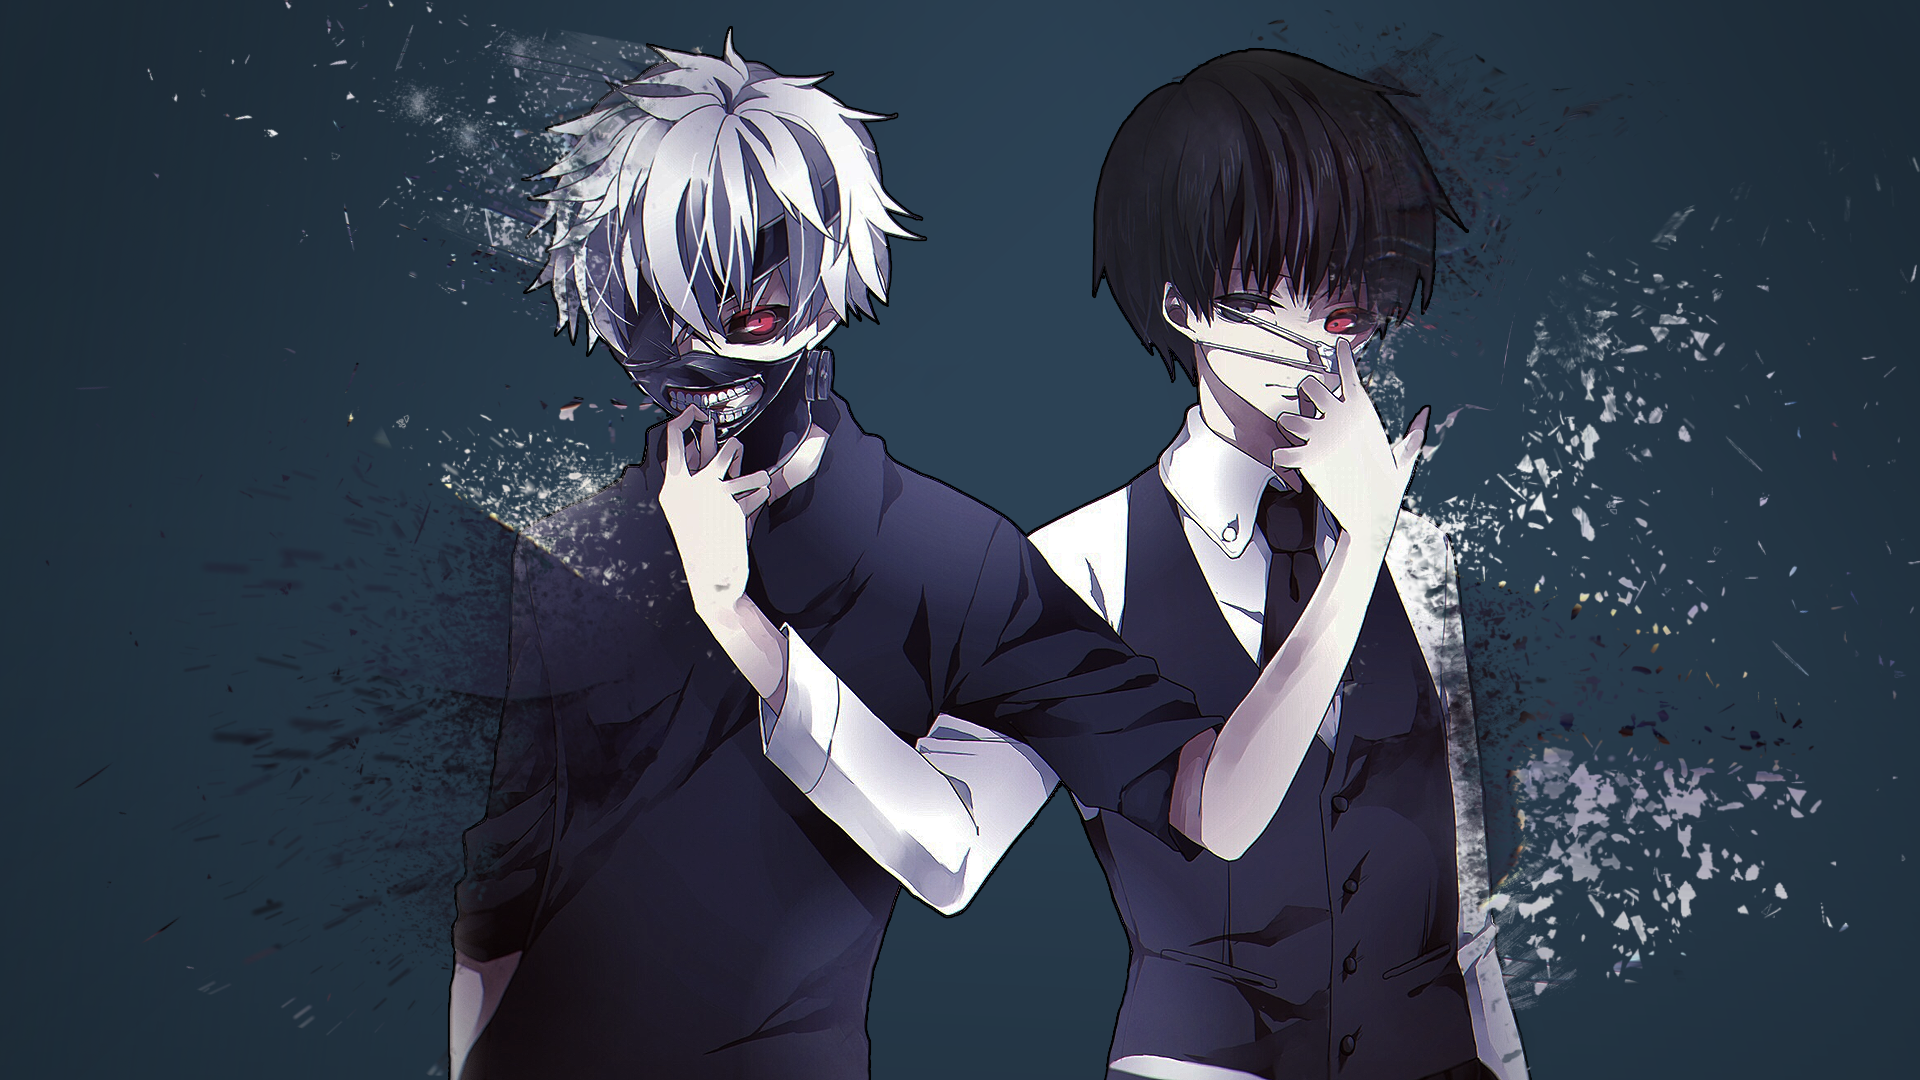

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Displaying the histogram for it

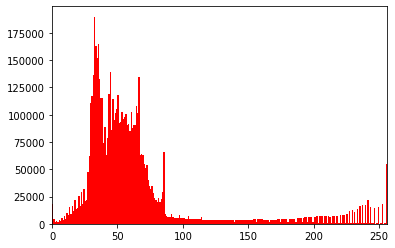

In [ ]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

Next we equilize individually to each color and then merge it into a single image.

In [ ]:
def histogram_equalization(img_in):

# segregate color streams
  b,g,r = cv.split(img_in)
  h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
  h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
  h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculate cdf    
  cdf_b = np.cumsum(h_b)  
  cdf_g = np.cumsum(h_g)
  cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
  cdf_m_b = np.ma.masked_equal(cdf_b,0)
  cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
  cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
  cdf_m_g = np.ma.masked_equal(cdf_g,0)
  cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
  cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
  cdf_m_r = np.ma.masked_equal(cdf_r,0)
  cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
  cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
# merge the images in the three channels
  img_b = cdf_final_b[b]
  img_g = cdf_final_g[g]
  img_r = cdf_final_r[r]
  
  img_out = cv2.merge((img_b, img_g, img_r))
# validation
  equ_b = cv2.equalizeHist(b)
  equ_g = cv2.equalizeHist(g)
  equ_r = cv2.equalizeHist(r)
  equ = cv2.merge((equ_b, equ_g, equ_r))
  #print(equ)
  #cv2.imwrite('output_name.png', equ)
  return img_out

Use our image as an argument to call the function




In [ ]:
img_out = histogram_equalization(img)

Displaying it.

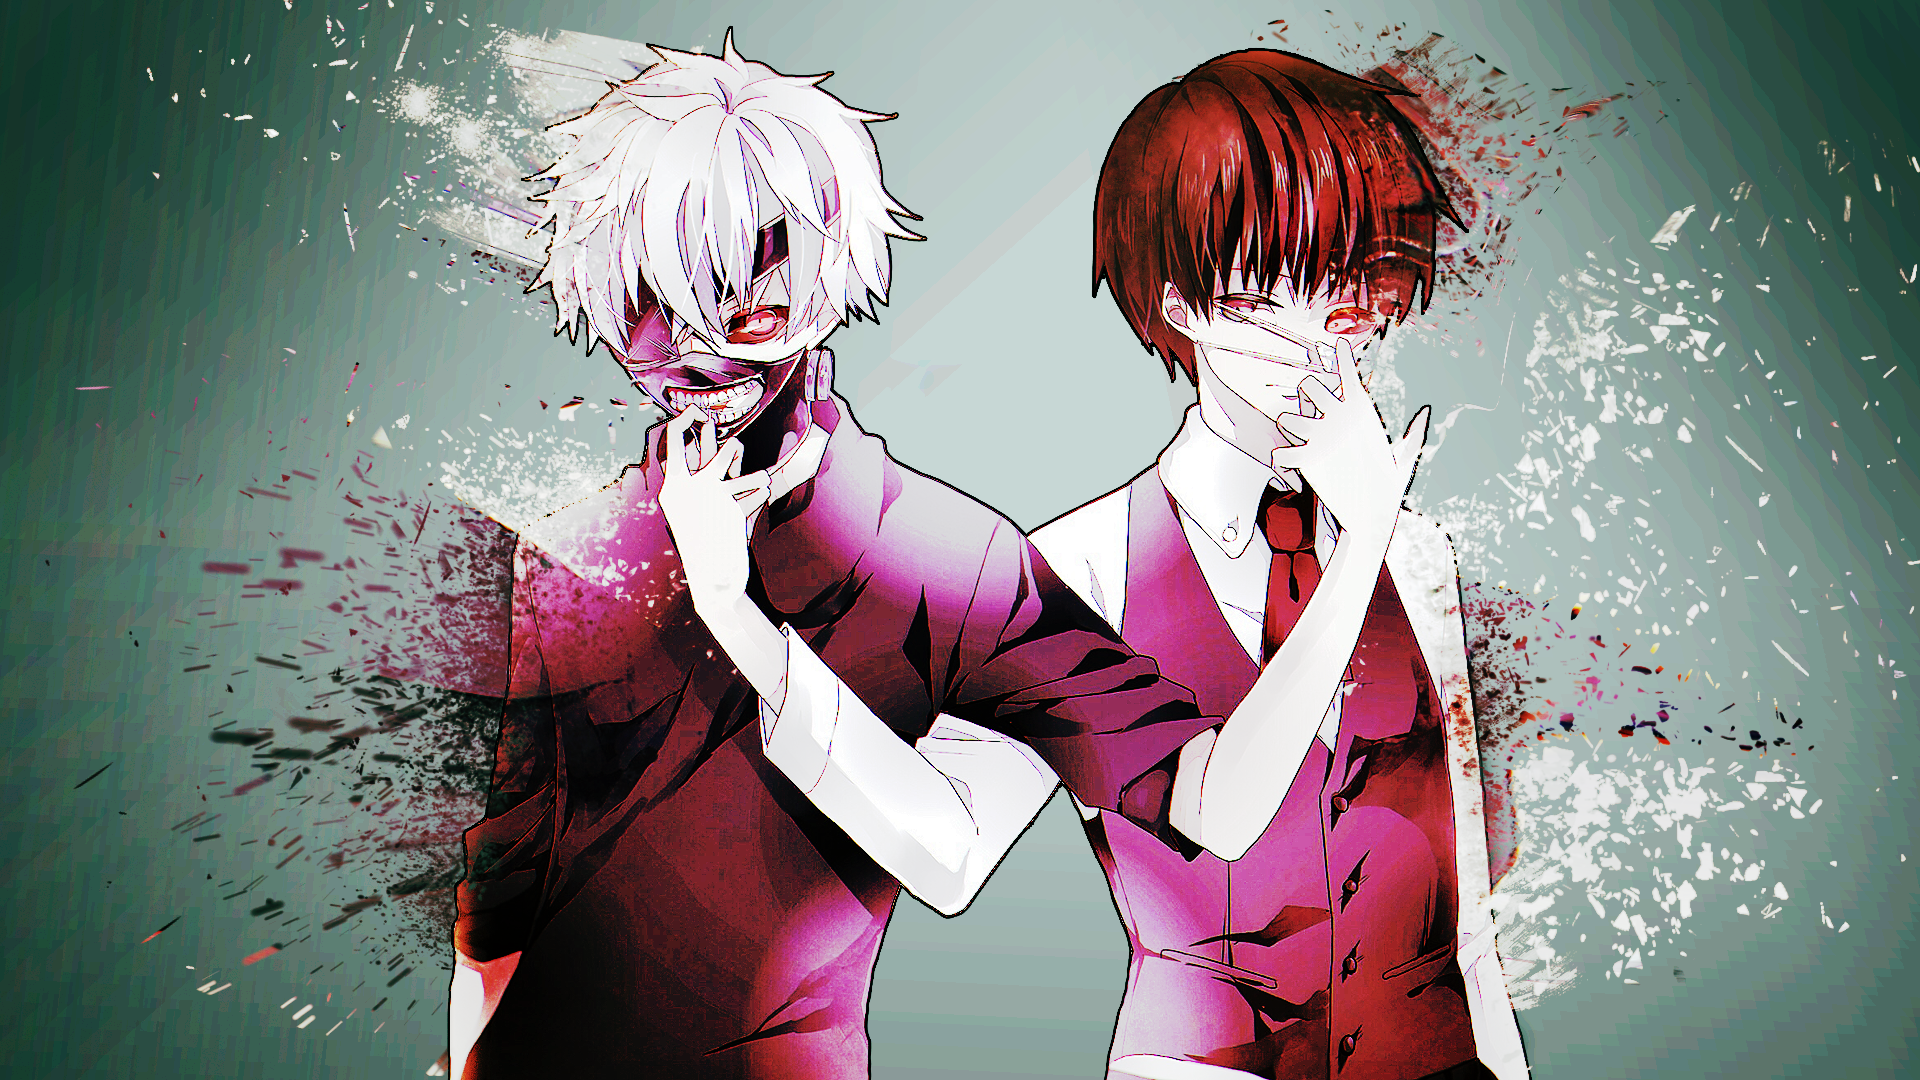

In [ ]:
cv2_imshow(img_out)
cv.waitKey(0)
cv.destroyAllWindows()

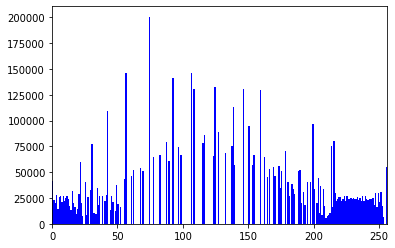

In [ ]:
hist,bins = np.histogram(img_out.flatten(),256,[0,256])
plt.hist(img_out.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.show()

## Implement Histogram equalization using Scikit


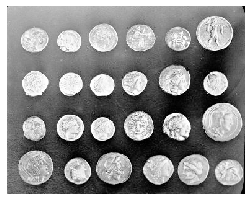

In [ ]:
from skimage import data, exposure
import matplotlib.pyplot as plt

coin = data.coins()                             #Using the coin data set
coin_equalized = exposure.equalize_hist(coin)   #Equilize

plt.figure(figsize=(7, 3))

plt.subplot(122)
plt.imshow(coin_equalized, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.show()